In [51]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

cpi = pd.read_csv(
    "cpi_data_formatted.csv", 
    infer_datetime_format=True,
    parse_dates=True
)


# Loading data
#cpi_file = r'CPI Data - Sheet1.csv'
#cpi = pd.read_csv(cpi_file)

# Convert 'DATE' to datetime
cpi['DATE'] = pd.to_datetime(cpi['DATE'], errors='coerce')

# Extract timestamp as a numerical representation of the date
#cpi['Timestamp'] = (cpi['DATE'] - pd.Timestamp("1960-01-01")) // pd.Timedelta('1D')
# Convert date to a float representation (e.g., YYYYMMDD)
#cpi['date_as_float'] = cpi['DATE'].apply(lambda x: float(x.strftime('%Y%m%d')) if pd.notnull(x) else x)

# Get dummies and encode 'President' columns as 0 and 1
df_encoded = pd.get_dummies(cpi, columns=['President'])
df_encoded = df_encoded.set_index("DATE")
# Convert boolean values to integers (0 and 1)
df_encoded[['President_Dem', 'President_Rep']] = df_encoded[['President_Democrat', 'President_Republican']].astype(int)

# Drop the original 'President' columns
#df_encoded = df_encoded.drop(['President_Democrat', 'President_Republican', 'DATE'], axis=1)
df_encoded = df_encoded.drop(['President_Democrat', 'President_Republican'], axis=1)

C:\Users\tlsul\AppData\Local\Temp\ipykernel_9760\3865168251.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cpi = pd.read_csv(


In [52]:
df_encoded

,Crude,natural_gas,Cocoa,Coffee,Soybeans,soybean_oil,soybean_meal,Maize,Wheat,Banana,...,Cotton,Rubber,Phosphate,Aluminum,Iron ore,Copper,Gold,CPI,President_Dem,President_Rep
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1.63,0.14,0.63,0.94,94.00,204.00,91.90,45.00,59.89,0.14,...,0.65,0.82,13.00,511.47,11.42,715.40,35.27,29.370,0,1
1960-02-01,1.63,0.14,0.61,0.95,91.00,201.00,86.70,44.00,60.99,0.14,...,0.65,0.83,13.00,511.47,11.42,728.19,35.27,29.410,0,1
1960-03-01,1.63,0.14,0.58,0.93,92.00,201.00,84.10,45.00,61.73,0.14,...,0.65,0.86,13.00,511.47,11.42,684.94,35.27,29.410,0,1
1960-04-01,1.63,0.14,0.60,0.93,93.00,207.00,86.70,45.00,60.99,0.14,...,0.64,0.86,13.00,511.47,11.42,723.11,35.27,29.540,0,1
1960-05-01,1.63,0.14,0.60,0.92,93.00,209.00,81.50,48.00,57.69,0.15,...,0.65,0.93,13.00,511.47,11.42,684.75,35.27,29.570,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,78.98,2.55,3.39,4.27,633.85,1135.74,517.23,242.38,345.50,1.55,...,2.05,1.49,342.50,2159.73,114.43,8476.68,1951.02,304.348,1,0
2023-08-01,84.72,2.58,3.46,4.12,583.93,1126.53,514.56,207.61,315.82,1.56,...,2.11,1.47,346.25,2136.57,110.20,8349.13,1918.70,306.269,1,0
2023-09-01,92.22,2.64,3.61,4.05,619.04,1111.63,509.31,223.81,314.68,1.56,...,2.16,1.55,347.50,2184.67,120.98,8276.71,1915.95,307.481,1,0


In [53]:
features = df_encoded[[
     'Crude', 'natural_gas', 'Cocoa', 'Coffee', 'Soybeans', 'soybean_oil',
    'soybean_meal', 'Maize', 'Wheat', 'Banana', 'Orange', 'Beef', 'Chicken',
    'Sugar', 'Cotton', 'Rubber', 'Phosphate', 'Aluminum', 'Iron ore', 'Copper',
    'Gold', 'President_Dem','President_Rep']]
#.astype(float)

target_variable = df_encoded['CPI']

In [64]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MaxAbsScaler
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
import matplotlib.pyplot as plt



In [55]:

target = target_variable


training_features, testing_features, training_target, testing_target = \
            train_test_split(features, target, random_state=42)

# Average CV score on the training set was: -3.7106600813535024
exported_pipeline = make_pipeline(
    MaxAbsScaler(),
    StackingEstimator(estimator=RidgeCV()),
    ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=3, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



In [56]:
# Evaluate the model on the test set
test_score = exported_pipeline.score(testing_features, testing_target)
print(f'Test Score: {test_score}')

Test Score: 0.999437022147395


In [57]:
final_predicted_cpi_results =results/10

In [59]:
results_df = pd.DataFrame({'Actual': testing_target, 'Predicted': results})

results_df = results_df.sort_index(ascending=True)  # Sort by the new index

# Print the first few rows of the DataFrame
print(results_df)

             Actual   Predicted
DATE                           
1960-03-01   29.410   29.533983
1960-07-01   29.550   29.609850
1960-08-01   29.610   29.650200
1960-11-01   29.780   29.754417
1961-12-01   30.010   29.948150
...             ...         ...
2022-01-01  282.599  276.310273
2022-04-01  288.611  291.282263
2022-10-01  297.987  297.123945
2023-07-01  304.348  299.651702
2023-08-01  306.269  302.282032

[192 rows x 2 columns]


<Axes: title={'center': 'CPI Actual vs Predicted Extra Tree Regressor'}, xlabel='DATE', ylabel='CPI in bps'>

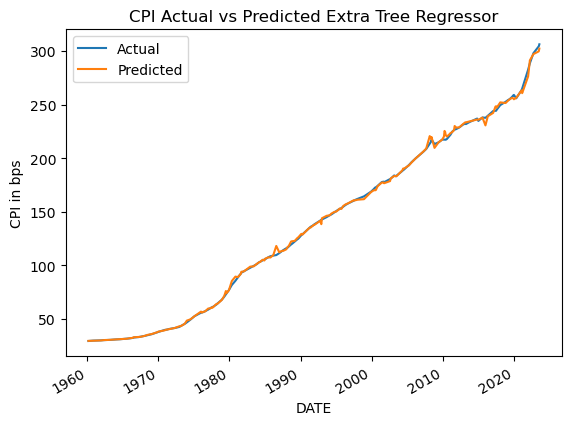

In [69]:
results_df.plot(title = 'CPI Actual vs Predicted Extra Tree Regressor', ylabel = 'CPI in bps' )